<a href="https://colab.research.google.com/github/kovelashashikala/LGMVIP-DataScience/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LGMVIP May 2023 Data Science Internship task 2**
 Stock Market Prediction and Forecasting using Stacked LSTM

# **Importing the Necessarty Libraries**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# **Reading the Data**

In [2]:
df=pd.read_csv('NSE-TATAGLOBAL.csv')

In [4]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


# **Exploring Data and Making required changes for better understanding**

In [6]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df1 = df.sort_values('Date')
df1.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [10]:
df1.reset_index(inplace=True)

# **Visualizing the Data**

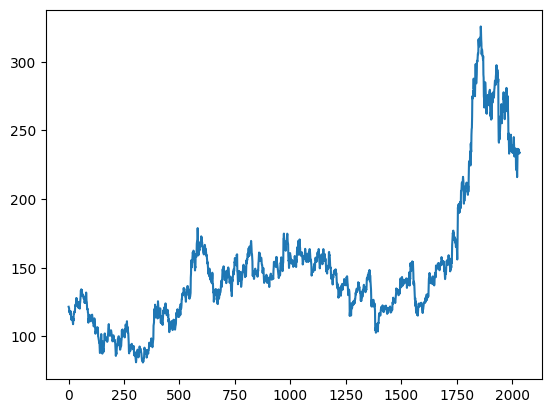

In [11]:
plt.plot(df1['Close'])

In [12]:
df1_close = df1['Close']
df1_close

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
df1_close = scaler.fit_transform(np.array(df1_close).reshape(-1,1))
df1_close

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

# **split the data**



In [17]:
training_size = int(len(df1_close)*0.70)
test_size = len(df1_close) - training_size
train, test = df1_close[0: training_size,:], df1_close[training_size : len(df1_close),:1]

In [18]:
# Let us convert the array values previously calculated into a matrix
def create_mat(ds, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(ds)-time_step-1):
        a = ds[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(ds[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [19]:
time_step = 100
X_train, y_train = create_mat(train, time_step)
X_test, y_test = create_mat(test, time_step)

In [20]:
X_train.shape

(1323, 100)

In [21]:
y_train.shape

(1323,)

In [22]:
X_test.shape

(510, 100)

In [23]:
y_test.shape

(510,)

In [24]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## **Create the LSTM Model**

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train, y_train, validation_split=0.1, epochs= 60, batch_size=64, verbose = 1)

Epoch 1/60
19/19 [==============================] - 13s 358ms/step - loss: 0.0098 - val_loss: 0.0019
Epoch 2/60
19/19 [==============================] - 4s 193ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 3/60
19/19 [==============================] - 4s 192ms/step - loss: 9.0369e-04 - val_loss: 0.0011
Epoch 4/60
19/19 [==============================] - 5s 255ms/step - loss: 8.6761e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 4s 196ms/step - loss: 7.9717e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 4s 192ms/step - loss: 7.6493e-04 - val_loss: 0.0010
Epoch 7/60
19/19 [==============================] - 5s 256ms/step - loss: 7.5140e-04 - val_loss: 0.0010
Epoch 8/60
19/19 [==============================] - 4s 190ms/step - loss: 7.5329e-04 - val_loss: 9.5309e-04
Epoch 9/60
19/19 [==============================] - 4s 200ms/step - loss: 7.5277e-04 - val_loss: 8.8658e-04
Epoch 10/60
19/19 [==============================] - 5s 255ms/s

# **Prediction**

In [28]:
predictions = model.predict(X_test)

16/16 [==============================] - 2s 44ms/step


In [29]:
# performing inverse transform on predictions
inv_predictions = scaler.inverse_transform(predictions)

In [30]:
inv_predictions

array([[144.12302 ],
       [144.42386 ],
       [143.80803 ],
       [141.60536 ],
       [139.81609 ],
       [138.84238 ],
       [139.39742 ],
       [140.67531 ],
       [141.35896 ],
       [141.43018 ],
       [141.40514 ],
       [142.35652 ],
       [143.12502 ],
       [144.53557 ],
       [146.56036 ],
       [145.43115 ],
       [143.42056 ],
       [142.58037 ],
       [142.62152 ],
       [146.40685 ],
       [150.6181  ],
       [153.52364 ],
       [154.79015 ],
       [153.58437 ],
       [153.09991 ],
       [152.47417 ],
       [152.40054 ],
       [153.55885 ],
       [154.33679 ],
       [154.6136  ],
       [155.0842  ],
       [154.29565 ],
       [151.60286 ],
       [146.54047 ],
       [142.66425 ],
       [140.76044 ],
       [140.27956 ],
       [139.61856 ],
       [137.96875 ],
       [135.06335 ],
       [132.64207 ],
       [131.13634 ],
       [129.123   ],
       [128.0517  ],
       [126.235664],
       [123.903786],
       [122.854256],
       [122.2

In [31]:
import math
from sklearn.metrics import mean_squared_error

In [32]:
mse = math.sqrt(mean_squared_error(y_test, predictions))
print("The Mean Squared Error for above model is: ", mse)

The Mean Squared Error for above model is:  0.027555455333119844
